# Wrangle and Analyze Data - WeRateDogs Project

## Gather

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#import programmatically using Requests library this URL:
#https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [3]:
#importing data from .tsv file
image_pred_df = pd.read_csv('image-predictions.tsv', sep='\t')

#importing data from the .csv file
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')

#Creating a dataframe with data from Twitter API
tAPI_df = pd.read_csv('tweet_json.txt')

## Assess

In [4]:
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [5]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
image_pred_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
image_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [10]:
tAPI_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8460,38450
1,892177421306343426,6230,32946
2,891815181378084864,4130,24821
3,891689557279858688,8588,41802
4,891327558926688256,9316,39971
5,891087950875897856,3087,20059
6,890971913173991426,2053,11741
7,890729181411237888,18771,64923
8,890609185150312448,4239,27576
9,890240255349198849,7349,31645


In [11]:
tAPI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 3 columns):
tweet_id          2096 non-null int64
retweet_count     2096 non-null int64
favorite_count    2096 non-null int64
dtypes: int64(3)
memory usage: 49.2 KB


In [12]:
tAPI_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.096000e+03,2096.000000,2096.000000
mean,7.368450e+17,2779.560115,8931.414599
std,6.716191e+16,4817.556758,12832.292455
min,6.660209e+17,12.000000,80.000000
25%,6.768539e+17,612.000000,1989.000000
50%,7.101471e+17,1346.000000,4082.500000
75%,7.882367e+17,3154.500000,11135.500000
max,8.924206e+17,84526.000000,164218.000000


### Quality

##### `twitter_df` table:
- *Tweet_id* should be considered as an object, not as int.
- *Timestamp* is object not datetime.
- There are retweets and replies from other users, not just 'reviews'.
- Lots of missing values in these columns: 
    - `in_reply_to_status_id` 
    - `in_reply_to_user_id`
    - `retweeted_status_id`
    - `retweeted_status_user_id`
    - `retweeted_status_timestamp`   
- Some values in `expanded_urls` are missing (59 values)
- `rating_numerator` shows a max value of 1776, and min of 0, check if valid.
- `rating_denominator` shows a max value of 170, and min of 0, check if valid.
- Some values of `rating_numerator` and `rating_denominator` are incorrect.
- Some names are just random words.
- Blank spaces should be considered null values.

##### `image_pred_df` table:
- `jpg_url` and `img_num` columns don't have useful data.
- Some values aren't dog breeds.

### Tidiness

- Columns `doggo`, `floofer`, `pupper` and `puppo` should be regrouped in the same column.
- The data from gathered with the API should be in the `twitter_df` table.


## Clean

In [13]:
twitter_df_clean = twitter_df.copy()
image_pred_df_clean = image_pred_df.copy()

### Formatting values

##### Define

The values in `timestamp` and `tweet_id` are respectively formatted as DateTime and object.

##### Code

In [14]:
#Formatting timestamp, tweet_id respectively as datetime and object

twitter_df_clean['timestamp'] = pd.to_datetime(twitter_df_clean['timestamp'])
twitter_df_clean['tweet_id'] = twitter_df_clean['tweet_id'].astype(object)

##### Test

In [15]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

### Selecting Reviews

##### Define

Querying for tweets with a `retweeted_status_id` not null and then eliminate these tweets, the same for replies.
Drop `expanded_urls` and `source` columns.

##### Code

In [16]:
#Eliminating retweets

drop_rt = twitter_df_clean.query("retweeted_status_id > 0").index.tolist()
twitter_df_clean = twitter_df_clean.drop(drop_rt)
twitter_df_clean = twitter_df_clean.drop(['retweeted_status_id', 
                                          'retweeted_status_user_id', 
                                          'retweeted_status_timestamp'], axis=1)
#Eliminating replies

drop_rp = twitter_df_clean.query("in_reply_to_status_id > 0").index.tolist()
twitter_df_clean = twitter_df_clean.drop(drop_rp)
twitter_df_clean = twitter_df_clean.drop(['in_reply_to_status_id',
                                          'in_reply_to_user_id'], axis=1)

#Eliminating url
twitter_df_clean = twitter_df_clean.drop(['expanded_urls',
                                          'source'], axis=1)

##### Test

In [17]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 180.2+ KB


### Replacing Names

##### Define

Search for random words that aren't valid names by looking at the first letter in the `name` column to see if it is an uppercase letter, if so replace those values with a blank space. Also replace every other *None* value with a blank space.

##### Code

In [18]:
#Eliminating false names (if lowercase then it's not a name) and replacing 'None' with a blank space

twitter_df_clean.name = twitter_df_clean.name.where(twitter_df_clean.name.str[0].str.isupper(), " ")
twitter_df_clean.name = twitter_df_clean.name.replace(["None", " "], "")

##### Test

In [19]:
twitter_df_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
1970,673295268553605120,2015-12-06 00:17:55,Meet Eve. She's a raging alcoholic 8/10 (would...,8,10,Eve,None,None,pupper,None
1530,690021994562220032,2016-01-21 04:03:58,"Say hello to Geoff (pronounced ""Kyle""). He acc...",10,10,Geoff,None,None,None,None
504,813051746834595840,2016-12-25 16:00:16,This is Bauer. He had nothing to do with the c...,13,10,Bauer,None,None,None,None
726,782598640137187329,2016-10-02 15:10:30,This is Timmy. He's quite large. According to ...,11,10,Timmy,None,None,None,None
1608,685641971164143616,2016-01-09 01:59:19,This is Otis. He just passed a cop while going...,7,10,Otis,None,None,pupper,None
1593,686386521809772549,2016-01-11 03:17:53,Say hello to Crimson. He's a Speckled Winnebag...,11,10,Crimson,None,None,None,None
1803,676948236477857792,2015-12-16 02:13:31,This is Karl. Karl thinks he's slick. 6/10 sne...,6,10,Karl,None,None,None,None
1141,727644517743104000,2016-05-03 23:42:26,Here's a doggo struggling to cope with the win...,13,10,,doggo,None,None,None
1743,679405845277462528,2015-12-22 20:59:10,Crazy unseen footage from Jurassic Park. 10/10...,10,10,,None,None,None,None


### Rating Numerator and Denominator

##### Define

Extracting the values from the text of each tweet and replacing the new values in the `rating_numerator` and `rating_denominator` columns.

##### Code

In [20]:
ratings = twitter_df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
twitter_df_clean = twitter_df_clean.join(ratings)
twitter_df_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)
twitter_df_clean = twitter_df_clean.rename(columns={0: "rating_numerator", 1: "rating_denominator"})
twitter_df_clean['rating_numerator'] = twitter_df_clean['rating_numerator'].astype(float)
twitter_df_clean['rating_denominator'] = twitter_df_clean['rating_denominator'].astype(float)

##### Test

In [21]:
twitter_df_clean.query('rating_numerator > 9 and rating_numerator < 10')

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,rating_numerator,rating_denominator
695,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",Logan,None,None,None,None,9.75,10.0


## Tidiness

### Names

##### Define

Create a dataframe with only the valid names, drop all columns except for `name`, merge the *names* dataframe with *twitter_df_clean* on *tweet_id*, create a new `name` column, finally drop the `name_x` and `name_y` columns in excess.

##### Code

In [22]:
#Replacing empty name values with Nan

names = twitter_df_clean.copy()
names = names[names.name != ""]
names = names.drop(['timestamp',
                    'text',
                    'rating_numerator',
                    'rating_denominator',
                    'doggo',
                    'floofer',
                    'pupper',
                    'puppo'], axis = 1)

twitter_df_clean = twitter_df_clean.merge(names, on='tweet_id', how='left')
twitter_df_clean['name'] = twitter_df_clean['name_y']
twitter_df_clean = twitter_df_clean.drop(['name_x','name_y'], axis = 1)

##### Test

In [23]:
twitter_df_clean.sample(10)

,tweet_id,timestamp,text,doggo,floofer,pupper,puppo,rating_numerator,rating_denominator,name
1836,670789397210615808,2015-11-29 02:20:29,Two obedient dogs here. Left one has extra leg...,None,None,None,None,9.0,10.0,NaN
1812,671151324042559489,2015-11-30 02:18:39,*struggling to breathe properly* 12/10 https:/...,None,None,None,None,12.0,10.0,NaN
1126,704347321748819968,2016-02-29 16:47:42,This is Ralphson. He's very confused. Wonderin...,None,None,pupper,None,10.0,10.0,Ralphson
967,718631497683582976,2016-04-09 02:47:55,We normally don't rate marshmallows but this o...,None,None,None,None,10.0,10.0,NaN
1319,689154315265683456,2016-01-18 18:36:07,We normally don't rate birds but I feel bad co...,None,None,None,None,9.0,10.0,NaN
1437,682259524040966145,2015-12-30 17:58:40,Meet Jax. He's an Iglesias Hufflepoof. Quite t...,None,None,None,None,9.0,10.0,Jax
1130,703774238772166656,2016-02-28 02:50:28,"""YOU CAN'T HANDLE THE TRUTH"" both 10/10 https:...",None,None,None,None,10.0,10.0,NaN
1183,699088579889332224,2016-02-15 04:31:20,This is Charl. He's a bully. Chucks that dumbb...,None,None,None,None,3.0,10.0,Charl
2092,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,None,None,None,None,5.0,10.0,NaN
904,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved sq...,None,None,None,None,204.0,170.0,NaN


### Dog Stages

##### Define

Replace all the *None* values with a blank space for each dog stage (`doggo`,`floofer`,`pupper`,`puppo`)
Melt the `doggo`,`floofer`,`pupper`,`puppo` columns of the *twitter_df_clean* dataframe in a new column called `dog_stage` in a new dataframe, then save only the ones that aren't blank, drop the `variable` column.
Merge the new dataframe with *twitter_df_clean* on `tweet_id` to get the null values in the original dataframe, then drop the `doggo`,`floofer`,`pupper`,`puppo` columns that are redundant.


##### Code

In [24]:
#Replacing doggo floofer pupper puppo 'None' values with blank space

twitter_df_clean.doggo = twitter_df_clean.doggo.replace("None", "")
twitter_df_clean.floofer = twitter_df_clean.floofer.replace("None", "")
twitter_df_clean.pupper = twitter_df_clean.pupper.replace("None", "")
twitter_df_clean.puppo = twitter_df_clean.puppo.replace("None", "")

In [25]:
#Creating dog_stage column

dog_stages = pd.melt(twitter_df_clean, id_vars='tweet_id', 
                           value_vars=['doggo','floofer','pupper','puppo'],value_name='dog_stage')

dog_stages = dog_stages[dog_stages.dog_stage != ""]
dog_stages = dog_stages.drop('variable', axis = 1)

#Merging dog_stage column with the df and eliminating redundant columns

twitter_df_clean = twitter_df_clean.merge(dog_stages, on='tweet_id', how='left')
twitter_df_clean = twitter_df_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

##### Test

In [26]:
twitter_df_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
2017,667538891197542400,2015-11-20 03:04:08,This is a southwest Coriander named Klint. Hat...,9.0,10.0,NaN,NaN
1247,694925794720792577,2016-02-03 16:49:55,Please only send in dogs. This t-rex is very s...,5.0,10.0,NaN,NaN
532,786963064373534720,2016-10-14 16:13:10,This is Rory. He's got an interview in a few m...,12.0,10.0,Rory,NaN
832,744709971296780288,2016-06-20 01:54:27,This is Harvey. He's stealthy af. 10/10 would ...,10.0,10.0,Harvey,NaN
1086,708026248782585858,2016-03-10 20:26:26,Everybody stop what you're doing and watch thi...,13.0,10.0,NaN,NaN
188,847842811428974592,2017-03-31 16:07:33,"This is Rontu. He is described as a pal, cuddl...",12.0,10.0,Rontu,NaN
822,746056683365994496,2016-06-23 19:05:49,This is Arlen and Thumpelina. They are best pa...,11.0,10.0,Arlen,NaN
39,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,12.0,10.0,Yogi,doggo
1892,670069087419133954,2015-11-27 02:38:14,This is Randall. He's from Chernobyl. Built pl...,5.0,10.0,Randall,NaN
902,734559631394082816,2016-05-23 01:40:38,When your friend is turnt af and you're just t...,10.0,10.0,NaN,NaN


### Dog Breeds

##### Define

Retrieve Dog breeds from `image_pred_df` and keep only the `tweet_id` column and the most reliable that we can use from this dataframe.

##### Code

In [27]:
image_pred_df_clean = image_pred_df_clean.query("p1_dog")
image_pred_df_clean = image_pred_df_clean[image_pred_df_clean.p1_conf > image_pred_df_clean.p1_conf.mean()]

image_pred_df_clean = image_pred_df_clean.drop(['jpg_url','img_num','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1)
image_pred_df_clean.reset_index(drop = True)

,tweet_id,p1
0,666050758794694657,Bernese_mountain_dog
1,666055525042405380,chow
2,666063827256086533,golden_retriever
3,666287406224695296,Maltese_dog
4,666345417576210432,golden_retriever
5,666396247373291520,Chihuahua
6,666421158376562688,Blenheim_spaniel
7,666437273139982337,Chihuahua
8,666691418707132416,German_shepherd
9,666701168228331520,Labrador_retriever


##### Test

In [28]:
image_pred_df_clean.sample(5)

,tweet_id,p1
1958,865359393868664832,Chesapeake_Bay_retriever
474,675147105808306176,golden_retriever
1957,865006731092295680,Pembroke
1048,713411074226274305,Great_Pyrenees
1706,817536400337801217,pug


### Merging

##### Define

Merge `tAPI_df` with `twitter_df_clean` on *tweet_id*.
 
Merge `image_pred_df_clean` with `twitter_df_clean` on *tweet_id*.
Rename `p1` column with `dog_breed`. 

##### Code

In [29]:
#Merge twitter_df_clean with tAPI_df

tAPI_df['tweet_id'] = tAPI_df['tweet_id'].astype(object)
twitter_df_clean = pd.merge(twitter_df_clean, tAPI_df, on=['tweet_id'])

image_pred_df_clean['tweet_id'] = image_pred_df_clean['tweet_id'].astype(object)
twitter_df_clean = pd.merge(twitter_df_clean, image_pred_df_clean, on=['tweet_id'], how='left')
twitter_df_clean = twitter_df_clean.rename(columns={"p1":"dog_breed"})

##### Test 

In [30]:
twitter_df_clean.sample()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed
160,854482394044301312,2017-04-18 23:50:52,This is Arya. She can barely contain her excit...,13.0,10.0,Arya,NaN,7223,30182,NaN


### WeRateDogs Vote 


In [31]:
#WeRateDogs vote

twitter_df_clean['vote'] = twitter_df_clean.rating_numerator / twitter_df_clean.rating_denominator

In [32]:
votes_df = twitter_df_clean[twitter_df_clean["vote"] < 2]

In [33]:
best = votes_df.loc[votes_df['vote'] == votes_df.vote.max()] 
best.shape[0]

38

The are 38 dogs with the highest vote wich is 14/10, so we have to use another parameter if we want to find the most voted dog. The `favorite_count` value can be considered as an indication of the vote of the public, so we'll use that.

In [34]:
best.loc[best['favorite_count'] == best.favorite_count.max()] 

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed,vote
355,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,14.0,10.0,Bo,doggo,40564,92892,NaN,1.4


The most popular Dog is this rottweiler puppo with no name.


### WeRateDogs vote vs Public

Let's see if the  public vote confirms the dog that has the highest vote from WeRateDogs.

In [35]:
twitter_df_clean["public"] = twitter_df_clean.favorite_count + twitter_df_clean.retweet_count

In [36]:
public_best = twitter_df_clean.loc[twitter_df_clean['public'] == twitter_df_clean.public.max()] 
public_best

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed,vote,public
846,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,13.0,10.0,NaN,doggo,84526,164218,Labrador_retriever,1.3,248744


We can see that this is a different dog from the one rated higher from WRD.

### Most popular Dog Breed

In [37]:
twitter_df_clean.dog_breed.value_counts().idxmax()

'golden_retriever'

The most popular dog breed is the Golden Retriever

### WeRateDogs popolarity

In [38]:
month_df = twitter_df_clean.groupby([pd.Grouper(key='timestamp',freq='1M')]).sum().reset_index()
month_df.head()

,timestamp,rating_numerator,rating_denominator,retweet_count,favorite_count,vote,public
0,2015-11-30,3034.00,2942.0,158782,372779,303.800000,531561
1,2015-12-31,3760.26,3880.0,558223,1298092,355.126000,1856315
2,2016-01-31,1958.00,1911.0,293067,747904,184.736364,1040971
3,2016-02-29,1309.00,1280.0,182910,495772,122.800000,678682
4,2016-03-31,1582.00,1510.0,223602,599434,138.800000,823036


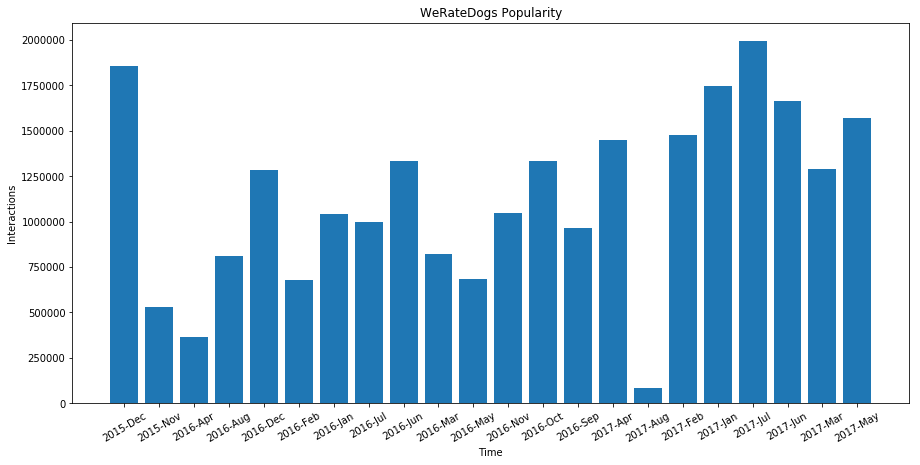

In [39]:
fig, ax = plt.subplots(figsize=(15, 7))
x = month_df.timestamp.dt.strftime('%Y-%b')
public = month_df["public"]
ax.bar(x, public)
ax.set(xlabel='Time', ylabel='Interactions', title='WeRateDogs Popularity')
plt.xticks(rotation=30)
plt.savefig('graph1.png')

As we can see, from November 2015 until July 2017 we have a big increase in the popularity of WeRateDogs Twitter account.

## Saving

In [40]:
twitter_df_clean.to_csv('twitter_archive_master.csv', index = False)